# Project 1: Telling a Story with Data
### Pittsburgh HealthyRide PGH Data
### Team 2: Anish Arora & Alton Lu
### AndrewID: anisha1, altonl

**Motivation**
In the era of city living, there are a lot of discussions about how to prioritize mobility of humans instead of vehicles. Cars are a flexible long-distance to bring a few people to any place needed. Buses move a lot of people from a single point A to point B without congesting the streets. 

Bicycles are one aspect of this mobility portfolio that can enable smaller distance flexible movement. A bike ride from the Pitt campus to CMU is better served by a bike than driving down the congested Forbes Ave. For reasons like this, bikes have been gaining in popularity again because of the cheaper, healthier, quicker way of moving around dense cities. However, biking itself comes with its own headaches, such as ownership, dealing with theft, and biking uphill. These are all issues that bikeshare companies try to rectify.

Much like Uber can provide a driver on-demand, a bike share company provides a bike sort-of-on-demand. Bicycles will be parked around a city that users can rent for short trips. If you have a trip to go on, an app will allow you to rent any bike nearby. 

HealthyRide PGH is a Pittsburgh Bikeshare company. They have nearly 60 stations around Pittsburgh. This project aims to analyze the bike data and provide recommendations. 


**Data**
1. HealthyRidePGH Bike ride data. 2 years 
2. Pittsburgh Steelers and Penguins game schedule and timings

The bike data is provided from HealthyRidePGH. We took the last two complete years, 2017 and 2016.
https://healthyridepgh.com/data/
The bike data itself is split by quarters and bike stations, which was a total of 12 different CSV files. 

The schedules for Football and Hockey were partially collected through a wikipedia scraper and partially coded by hand. There was no consistent place to find all the data and there were slight issues, as many sports outlets change the 'start time' to the string 'Final' after the game is completed. Data was collected from a combination of wikipedia, ESPN, and NHL.com.  


#### Key Questions:
There are three main questions we sought to answer:
1. When are bikes used most often? During morning? Weekdays? Summer months? How can this usage inform HealthyPGH of growth opportunities?
2. Are there opporunities to improve bike share availabily to support commutes or connect to other transportation options?
3. Can HealthyRidePGH make peak traffic times, such as large events, less congested?

#### Hypothesis and Assumptions
We had several assumptions when we began this project.
1. Bikes are most often used in a consistent pattern. Bikeshares see the most utilization such as weekday commutes in the morning. However, while they are used most in the morning, we also assume that one-way trips will be the norm, such as an individual biking to work, but taking a bus back.
2. Weather plays a significant role. There will be few bike rides in the winter months. 
3. Bikes play a significant role during events, such as sports. People will use bikes as a way to avoid traffic. 

#### Methods and Approach
We use a combination of Tableau and Python to organize the data and produce visualizations. 


## Part 1: Data Cleaning and Organization

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

The following code reads in each quarter of bike data as well as the stations and removes a few duplicate columns

In [2]:
########## reading in data ###############
df1 = pd.read_csv('HealthyRide Rentals 2017 Q1.csv')
df2 = pd.read_csv('HealthyRide Rentals 2017 Q2.csv')
df3 = pd.read_csv('HealthyRide Rentals 2017 Q3.csv')
df4 = pd.read_csv('HealthyRide Rentals 2017 Q4.csv')
df5 = pd.read_csv('HealthyRide Rentals 2016 Q1.csv')
df6 = pd.read_csv('HealthyRide Rentals 2016 Q2.csv')
df7 = pd.read_csv('HealthyRide Rentals 2016 Q3.csv')
df8 = pd.read_csv('HealthyRide Rentals 2016 Q4.csv')
stations = pd.read_csv('HealthyRideStations2017.csv')
stations2 = pd.read_csv('HealthyRideStations2016.csv')


########## joining data and stations ###############
# Merging 2016 and 2017 Station Locations and the 8 quarters of bike data
stations = pd.concat([stations, stations2]).drop_duplicates().reset_index(drop=True)
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

# Merging data and stations together. Have to merge twice to get the starting station and ending station information
stations = stations.drop('Station Name', axis=1)
data = pd.merge(data, stations, left_on = 'From station id', right_on = 'Station #', how='left')
data = pd.merge(data, stations, left_on = 'To station id', right_on = 'Station #', how='left')
data.columns = ['Trip id', 'Starttime', 'Stoptime', 'Bikeid', 'Tripduration', 'From station id',
    'From station name', 'To station id', 'To station name', 'Usertype', 'Station #x', '# of Racks', 'Start Latitude', 'Start Longitude', 'Station#y', '# racks y', 'End Latitude', 'End Longitude']

# Dropping duplicate columns
data = data.drop(['Station #x', 'Station#y', '# racks y'], axis=1)

### data.to_csv('PittsburghBikeShare2016-2017.csv', index=False)

In [3]:
data.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,# of Racks,Start Latitude,Start Longitude,End Latitude,End Longitude
0,25723960,1/1/2017 8:28,1/1/2017 8:30,70478,110,1043,S Millvale Ave & Centre Ave,1044,Zulema St & Coltart Ave,Subscriber,15.0,40.438876,-79.960179,40.435986,-79.956942
1,25724207,1/1/2017 9:53,1/1/2017 10:00,70439,426,1014,Ridge Ave & Brighton Rd (CCAC),1012,North Shore Trail & Fort Duquesne Bridge,Customer,19.0,40.450595,-80.013204,40.445834,-80.008882
2,25724297,1/1/2017 10:21,1/1/2017 10:46,70440,1498,1019,42nd St & Butler St,1012,North Shore Trail & Fort Duquesne Bridge,Subscriber,17.0,40.470212,-79.960663,40.445834,-80.008882
3,25724391,1/1/2017 11:03,1/1/2017 11:30,70002,1581,1019,42nd St & Butler St,1013,Isabella St & Federal St (PNC Park),Customer,17.0,40.470212,-79.960663,40.447166,-80.003566
4,25724479,1/1/2017 11:43,1/1/2017 12:09,70024,1563,1018,Butler St & Stanton Ave,1013,Isabella St & Federal St (PNC Park),Customer,21.0,40.466103,-79.964628,40.447166,-80.003566


In the bike data, we have 15 variables and 150,421 separate bike trips. Each row contains both the start and end of a trip, the start location and end location, as well as some basic user data.

#### Origin-Destination Plots
Because we're also interested in specific route data, 'which routes are most popular', we also need to organize the data in a way that Tableau likes. In order to create this route plot, or 'Spider Plot', we need to have each bike trip split into two rows: one for origin and one for destination.

This next code chunk duplicates the bike dataframe and reassigns the start and end lat/long to simply lat and long. The two dataframes are then stacked to form the origin-destination dataframe that is suited to spider plots. 

In [4]:
########## creating Origin Destination pairs and Path ID for Tableau ###############

# Tableau requires this for each 'origin-destination' pair
# https://onlinehelp.tableau.com/current/pro/desktop/en-us/maps_howto_origin_destination.html FROM EXAMPLE 2

# created 2 paths so we know the exact station name as well. Can use either one for Tableau
data['path'] = data['From station id'].map(str) + '-' + data['To station id'].map(str)
data['path name'] = data['From station name'].map(str) + '-' + data['To station name'].map(str)

# Splitting into two dataframes: origin and destination. Will append together to get two rows per bike ride
origin = data[['Trip id', 'Starttime', 'Stoptime', 'Bikeid', 'Tripduration', 'From station id',
    'From station name', 'To station id', 'To station name', 'Usertype', '# of Racks', 'Start Latitude', 'Start Longitude', 'path', 'path name']]

destination = data[['Trip id', 'Starttime', 'Stoptime', 'Bikeid', 'Tripduration', 'From station id',
    'From station name', 'To station id', 'To station name', 'Usertype', '# of Racks', 'End Latitude', 'End Longitude', 'path', 'path name']]

# Renaming the starting and ending Lat/long columns to simply lat and long
origin = origin.rename(columns = {'Start Latitude':'Latitude', 'Start Longitude':'Longitude'})
destination = destination.rename(columns = {'End Latitude':'Latitude', 'End Longitude':'Longitude'})

# Creating a new column to specify if the row is an 'origin' or a 'destination' row
origin.insert(0, 'Origin-Destination', 'Origin')
destination.insert(0, 'Origin-Destination', 'Destination')

# Concat both dataframes
origin_destination_pittsburgh = pd.concat([origin, destination])
### origin_destination_pittsburgh.to_csv("origin_destination_pittsburgh.csv", index=False)

In [5]:
origin_destination_pittsburgh.sort_values(by=['Trip id', 'Origin-Destination'], ascending=False).head()

,Origin-Destination,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,# of Racks,Latitude,Longitude,path,path name
71845,Origin,41487046,12/31/2017 23:07,12/31/2017 23:16,70321,539,1037,Frew St & Schenley Dr,1041,Fifth Ave & S Bouquet St,Subscriber,20.0,40.441032,-79.948042,1037-1041,Frew St & Schenley Dr-Fifth Ave & S Bouquet St
71845,Destination,41487046,12/31/2017 23:07,12/31/2017 23:16,70321,539,1037,Frew St & Schenley Dr,1041,Fifth Ave & S Bouquet St,Subscriber,20.0,40.442325,-79.957604,1037-1041,Frew St & Schenley Dr-Fifth Ave & S Bouquet St
71844,Origin,41486385,12/31/2017 19:37,12/31/2017 20:02,70492,1492,1035,Fifth Ave & S Dithridge St,1045,S 27th St & Sidney St. (Southside Works),Customer,19.0,40.446744,-79.950881,1035-1045,Fifth Ave & S Dithridge St-S 27th St & Sidney ...
71844,Destination,41486385,12/31/2017 19:37,12/31/2017 20:02,70492,1492,1035,Fifth Ave & S Dithridge St,1045,S 27th St & Sidney St. (Southside Works),Customer,19.0,40.427899,-79.966112,1035-1045,Fifth Ave & S Dithridge St-S 27th St & Sidney ...
71843,Origin,41486032,12/31/2017 17:11,12/31/2017 17:25,70464,846,1012,North Shore Trail & Fort Duquesne Bridge,1002,Third Ave & Wood St,Customer,35.0,40.445834,-80.008882,1012-1002,North Shore Trail & Fort Duquesne Bridge-Third...


With the reformatting, we now have a separate row for trip id origin and desination. So now we have two separate dataframes. One for each trip, and an origin-destination data.

However, we also merged the data with event based data. 

In [6]:
### Load Schedule data and convert to proper time
schedule = pd.read_csv('SteelersSchedule.csv')
# schedule = pd.read_csv('PenguinsSchedule.csv')
schedule['Date'] = pd.to_datetime(schedule['Date'])
schedule['Game start'] = schedule['Date'].dt.time
schedule['Game day'] = schedule['Date'].map(lambda x: x.strftime('%Y/%m/%d'))
schedule['Game day'] = pd.to_datetime(schedule['Game day'])
schedule.head()

,Date,Home,Home_dummy,Game start,Game day
0,2017-09-10 13:00:00,Away,0,13:00:00,2017-09-10
1,2017-09-17 13:00:00,Home,1,13:00:00,2017-09-17
2,2017-09-24 13:00:00,Away,0,13:00:00,2017-09-24
3,2017-10-01 13:00:00,Away,0,13:00:00,2017-10-01
4,2017-10-08 13:00:00,Home,1,13:00:00,2017-10-08


The 'Game Day' becomes the primary key for joining schedule with the bike data. Otherwise, the time aspect of the Date would make it difficult to join the separate datasets. Here, we show only steelers data, but the penguins data is in the same format. 

In [7]:
### Convert parts of the bikes data into time and date format. Also create the 'Game day' column, exept named 'Date'
data = pd.read_csv('PittsburghBikeShare2016-2017.csv')
data['Starttime'] = pd.to_datetime(data['Starttime'])
data['Stoptime'] = pd.to_datetime(data['Stoptime'])
data['Game day'] = data['Starttime'].map(lambda x: x.strftime('%Y/%m/%d'))
data['Game day'] = pd.to_datetime(data['Game day'])

df = pd.merge(data, schedule, on='Game day', how='right')

df['Kickoff'] = df['Game start'].map(lambda x: x.strftime('%H:%M:%S'))

In [8]:
df['beforeKickoff'] = df['Date'] - df['Stoptime']
df.head(10)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,...,Start Longitude,End Latitude,End Longitude,Game day,Date,Home,Home_dummy,Game start,Kickoff,beforeKickoff
0,25723960,2017-01-01 08:28:00,2017-01-01 08:30:00,70478,110,1043,S Millvale Ave & Centre Ave,1044,Zulema St & Coltart Ave,Subscriber,...,-79.960179,40.435986,-79.956942,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,04:30:00
1,25724207,2017-01-01 09:53:00,2017-01-01 10:00:00,70439,426,1014,Ridge Ave & Brighton Rd (CCAC),1012,North Shore Trail & Fort Duquesne Bridge,Customer,...,-80.013204,40.445834,-80.008882,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,03:00:00
2,25724297,2017-01-01 10:21:00,2017-01-01 10:46:00,70440,1498,1019,42nd St & Butler St,1012,North Shore Trail & Fort Duquesne Bridge,Subscriber,...,-79.960663,40.445834,-80.008882,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,02:14:00
3,25724391,2017-01-01 11:03:00,2017-01-01 11:30:00,70002,1581,1019,42nd St & Butler St,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.960663,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,01:30:00
4,25724479,2017-01-01 11:43:00,2017-01-01 12:09:00,70024,1563,1018,Butler St & Stanton Ave,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.964628,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,00:51:00
5,25724508,2017-01-01 11:55:00,2017-01-01 12:23:00,70195,1647,1018,Butler St & Stanton Ave,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.964628,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,00:37:00
6,25724512,2017-01-01 11:57:00,2017-01-01 12:05:00,70017,507,1039,Atwood St & Bates St,1037,Frew St & Schenley Dr,Customer,...,-79.953670,40.441032,-79.948042,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,00:55:00
7,25724515,2017-01-01 11:57:00,2017-01-01 12:24:00,70143,1621,1018,Butler St & Stanton Ave,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.964628,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,00:36:00
8,25724587,2017-01-01 12:22:00,2017-01-01 12:32:00,70010,640,1037,Frew St & Schenley Dr,1037,Frew St & Schenley Dr,Customer,...,-79.948042,40.441032,-79.948042,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,00:28:00
9,25724680,2017-01-01 13:08:00,2017-01-01 14:43:00,70109,5683,1040,O'Hara St and University Place (Soldiers and S...,1040,O'Hara St and University Place (Soldiers and S...,Customer,...,-79.957102,40.445128,-79.957102,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,-1 days +22:17:00


We now have the specific column 'BeforeKickoff' which specifies how long it is before the hockey game or football game starts. We'd want to specifically change this to one that's easier to plot, so we convert the time to minutes. Notice the last row which specifies -1 days. It means that the kickoff has passed. Dealing with that -1 or -2 days was an issue that we had to work out.

In [9]:
# Creating the minutes before kickoff
time = pd.DatetimeIndex(df['beforeKickoff'])
days = time.day

# Changing the days to actual value. The -1 day appears as a 31 or 30 in the dataset
days.values[(days == 1)] = 0
days.values[(days == 31)] = 1
days.values[(days == 30)] = 2

# Calculating the actual time before kickoff.
beforeKickoff = time.hour * 60 + time.minute - days * 1440
df['beforeKickoff'] = beforeKickoff

df.head()
##### Code for saving and re-running for the penguins data to create combined dataset in folder.
# df.to_csv('Game day.csv', index=False)
# df.to_csv('CombinedPenguinsSteelers.csv', index=False)

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,...,Start Longitude,End Latitude,End Longitude,Game day,Date,Home,Home_dummy,Game start,Kickoff,beforeKickoff
0,25723960,2017-01-01 08:28:00,2017-01-01 08:30:00,70478,110,1043,S Millvale Ave & Centre Ave,1044,Zulema St & Coltart Ave,Subscriber,...,-79.960179,40.435986,-79.956942,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,270
1,25724207,2017-01-01 09:53:00,2017-01-01 10:00:00,70439,426,1014,Ridge Ave & Brighton Rd (CCAC),1012,North Shore Trail & Fort Duquesne Bridge,Customer,...,-80.013204,40.445834,-80.008882,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,180
2,25724297,2017-01-01 10:21:00,2017-01-01 10:46:00,70440,1498,1019,42nd St & Butler St,1012,North Shore Trail & Fort Duquesne Bridge,Subscriber,...,-79.960663,40.445834,-80.008882,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,134
3,25724391,2017-01-01 11:03:00,2017-01-01 11:30:00,70002,1581,1019,42nd St & Butler St,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.960663,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,90
4,25724479,2017-01-01 11:43:00,2017-01-01 12:09:00,70024,1563,1018,Butler St & Stanton Ave,1013,Isabella St & Federal St (PNC Park),Customer,...,-79.964628,40.447166,-80.003566,2017-01-01,2017-01-01 13:00:00,Home,1,13:00:00,13:00:00,51


In [10]:
events = pd.read_csv('CombinedPenguinsSteelers.csv')
events.head()

,# of Racks,Bikeid,Date_y,End Latitude,End Longitude,From station id,From station name,Home,Start Latitude,Start Longitude,Starttime,Stoptime,To station id,To station name,Trip id,Tripduration,Usertype,beforeKickoff
0,15.0,70467,2017-01-08 13:00:00,40.434338,-79.951877,1043,S Millvale Ave & Centre Ave,Home,40.438876,-79.960179,2017-01-08 01:22:00,2017-01-08 01:32:00,1038,Boulevard of the Allies & Parkview Ave,25749826,595,Subscriber,688
1,15.0,70477,2017-01-08 13:00:00,40.434338,-79.951877,1043,S Millvale Ave & Centre Ave,Home,40.438876,-79.960179,2017-01-08 01:22:00,2017-01-08 01:28:00,1038,Boulevard of the Allies & Parkview Ave,25749827,339,Subscriber,692
2,15.0,70045,2017-01-08 13:00:00,40.434338,-79.951877,1043,S Millvale Ave & Centre Ave,Home,40.438876,-79.960179,2017-01-08 01:23:00,2017-01-08 01:29:00,1038,Boulevard of the Allies & Parkview Ave,25749828,358,Customer,691
3,15.0,70431,2017-01-08 13:00:00,40.435986,-79.956942,1043,S Millvale Ave & Centre Ave,Home,40.438876,-79.960179,2017-01-08 07:41:00,2017-01-08 07:47:00,1044,Zulema St & Coltart Ave,25750279,412,Subscriber,313
4,19.0,70477,2017-01-08 13:00:00,40.438876,-79.960179,1038,Boulevard of the Allies & Parkview Ave,Home,40.434338,-79.951877,2017-01-08 12:31:00,2017-01-08 12:39:00,1043,S Millvale Ave & Centre Ave,25751105,520,Subscriber,21


#### Part 1 Conclustion
We now have the datasets we need to perform the set of analysis we are interested in.
1. We have the basic dataset 'PittsburghBikeShare2016-2017' which show 2 years worth of bike rides
2. We have the 'origin_destination_pittsburgh' which is where each bike ride is split into two separate rows
3. We have a smaller dataset 'CombinedPenguinsSteelers'of days when there was a home or away game being played by the Steelers or Penguins.

In [11]:
#events = pd.read_csv('CombinedPenguinsSteelers.csv')
#data = pd.read_csv('PittsburghBikeShare2016-2017.csv')
#routes = pd.read_csv('origin_destination_pittsburgh.csv')

## Data Visualizations
### Part 2: Riding Duration per Bike, Timing and Seasonality

In order to understand ridership pattern, bike usage, and trends, we use Tableau to visualize some of the data. We create plots for the following:
- Bike usage
- Time of day usage
- Seasonality
- By week usage

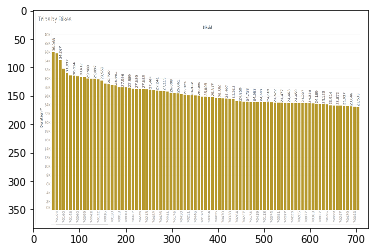

In [13]:
durationplot = mpimg.imread('perBikeDuration.png')
imgplot = plt.imshow(durationplot, aspect='auto')

This is the head of every single bike plot and we see that there is already a drastic difference between the top bike used and the rest. We assume that a few bikes are placed somewhere downtown and just happened to be the few that were used in heavily routed locations. Ideally, we would want to see a more uniform distributions so that bike maitenance is more predictable. 

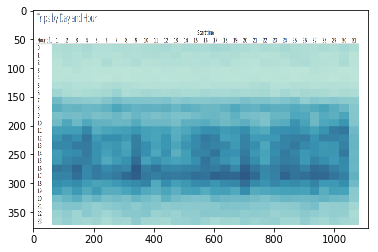

In [18]:
TimeOfDayplot = mpimg.imread('TimeOfDay.png')
imgplot = plt.imshow(TimeOfDayplot, aspect='auto')

This plot represents the time of day usage. Our original hyptohesis was that bike rides would be used more heavily during the commute hours, but that's not the case. What this plot reveals is that the most heavy usage of bike rides occurs between the hours of 12pm and 5pm. This is between those peak commute hours and suggests that these bike rides are used more often for leisure or during a quick trip in the work day.

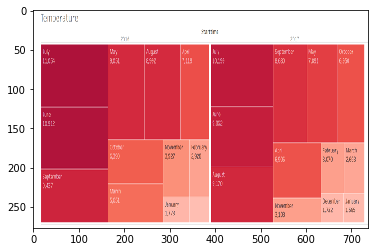

In [19]:
Seasonalityplot = mpimg.imread('Seasonality.png')
imgplot = plt.imshow(Seasonalityplot, aspect='auto')

We also looked at seasonality. And this plot reveals that are assumptions are correct.
Pittsburgh is cold. And people dislike riding bikes in cold weather. 

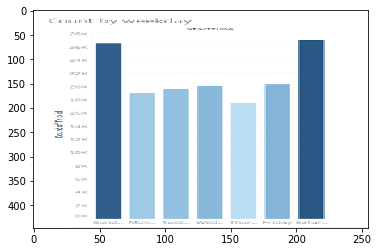

In [20]:
WeekdayCountplot = mpimg.imread('WeekdayCount.png')
imgplot = plt.imshow(WeekdayCountplot, aspect='auto')

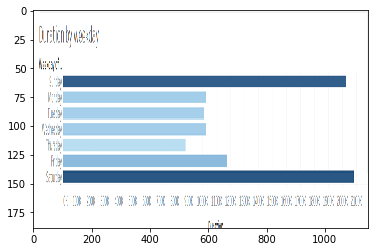

In [21]:
WeekdayDurationplot = mpimg.imread('WeekdayDuration.png')
imgplot = plt.imshow(WeekdayDurationplot, aspect='auto')

Our final two plots show another hyptohesis broken. People bike far more often during the weekend than the weekdays. This represents a possible opportunity for growth. If there aren't that many people riding during the weekday, HealthyRidePGH can market and encourage these riders more - perhaps building more relationships with businesses or markeintg in a different way.

Thus, there are two key recommendations from this analysis.
1. Bike usage is obviously not at peak demand during commutes. The example of more bike rides during the weekend and more during the middle hours of the day suggest a key area that HealthyRidePGH should focus on for growth.
2. Bike usage is not distributed uniformly. In order to maximize the lifespan of bikes, HealthyRide should think about moving bikes in less-used areas to the heavily trafficked areas. This would minimize the need for replacements and maintenance. 

### Part 3: Event-based Bike Usage (with the Steelers and Penguins)

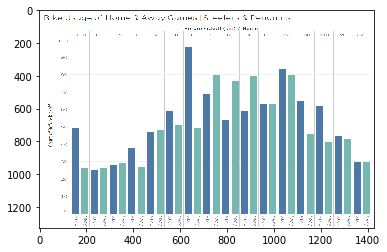

In [12]:
eventplot = mpimg.imread('BikeUsagePittsburghGames.png')
imgplot = plt.imshow(eventplot, aspect='auto')

This visualization was developed in tableau by plotting the frequency of rides in 30 minute intervals. The 0 duration point specifies when game starts. The dark blue is home games and the light blue are away games. We assume that home game usage should be higher than away game usage.


The first thing that should imediately jump out about this plot is the usage of bikes during Home games compared to Away games at the 0 Before kickoff mark. This bin specifies 15 minutes before the game starts and 15 minutes after it starts (the 30 minutes around gametime). 

Secondaly is the point at the 180 minute mark, or 3 hours later. Most football and hockey games last about 3 hours, so this jump in bike usage is also evident of home games.

Conclusion? People indeed use bikes a little bit more often during home games than away games. There is a subset of the population that uses bike shares to get to large events.

However, we need to inspect the axes and understand the data more. There are 82 hockey games in a season and 16 football games (without playoffs). That means our event data covers roughly 200 games, 100 in pittsburgh and 100 elsewhere. There are about 20,000 seats at PPG Paints Arena (Penguins) and 60,000 at Heinz Field (Steelers). The total sum of people who took a HealthyRide bike to one of the stations within one hour of the game starting is less than 200. That's less than 1% of 1% of average fan attendance. 

Our analysis shows that an extremely small group of fans have found it useful to use a HealthyRide bike to get to some of these events, however, compared to the entire population, there is almost no utilization. It doesn't appear as if there is demand and bikes may have limited impact in reducing congestion during these peak hours. HealthyRide shouldn't use resources in attempting event-based services. 

### Part 4: Stations in Pittsburgh

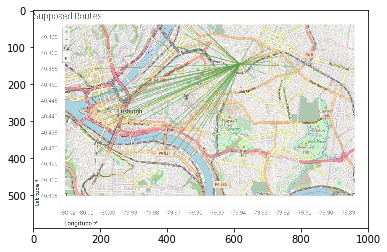

In [22]:
SpiderMapplot = mpimg.imread('SpiderMap.png')
imgplot = plt.imshow(SpiderMapplot, aspect='auto')

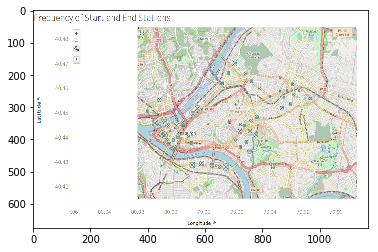

In [23]:
FODMapplot = mpimg.imread('FrequencyOriginDestinationMap.png')
imgplot = plt.imshow(FODMapplot, aspect='auto')

The first plot shows a spider plot from one station showing the movement of bikes from there to different stations. The second plot shows the frequency of bikes originating from and having those stations as their destination. 

The first plot shows all bike routes that originated from a station on Centre & Aiken. We chose this station to represent a CMU student that was too far for walking distance, but close enough where a bike ride would be easy and reasonable. However, as shown, there are no routes going to the CMU area.

The second plot shows why. There are not stations that service CMU on the north or east side. The closet bike station is on North Neville Street and Ellsworth Ave - about a 12 minute walk from CMU. At that point, it makes more sense for people to take the bus. Furthermore, there are no stations near the 2nd highest density of students - Squirrel Hill. 

From these plots, we have two recommendations.
1. Place bike stations at CMU, in partiuclar at least two locations that are convenient for Shadyside students and one more convenient for those riding from Squirrel Hill.
2. Place bike stations in Squirrel hill to service students in that area. The buses to Squirrel hill are often over-crowded and late. A quick bike ride is something that students would utilize in order to avoid those peak bus hours where students are cramming on to a single bus.

## Conclusion

We've found through some simple and more complicated visualizations and data exploration that HealthyRidePGH has some opportunities for growth. We've also identified that there are areas where they should not invest in for lack of demand. In general, HealthyRide should target the following groups:

**Commuters** as this represent a group that could grow more in ridership as shown by our weekly usage plots and the time of usage. 

**Students at CMU** lack a reliable way to actually use any of the stations. There are no stations near CMU, no stations near Squirrel Hill. When targeting the next areas to place new bike racks, HealthyPGH should look to CMU for growth.

**Event-based ridership** should be avoided. There just isn't the capacity for bikes to make a dent in the congestion. On another note, having potentially inebriated riders from after sporting events could increase damage to bikes.

**Seasonality** probably isn't something that can be worked around. People won't bike during cold weather as evidenced by the 90% decrease in ridership during the winter months. 